# Customer Segmentation and Analysis 
### Steps to solve the problem :
1. Importing Libraries.
2. Exploration of data.
3. Data Visualization.
4. Clustering using K-Means.
5. Selection of Clusters.
6. Making an optimal number of clusters

## Importing Libraries.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")
%config Completer.use_jedi = False

## Data Exploration

In [2]:
df = pd.read_csv(r'Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Know about columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Converting gender feature to numeric values
- male = 1
- female = 0

In [6]:
label_encoder = preprocessing.LabelEncoder()

df['Gender']= label_encoder.fit_transform(df['Gender'])

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## No. of unique customers

In [8]:
len(df.CustomerID.unique())

200

## Data Visualization

### Count Plot of Gender

In [9]:
df.groupby(['Gender']).count()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
0,112,112,112,112
1,88,88,88,88


<AxesSubplot:xlabel='Gender', ylabel='count'>

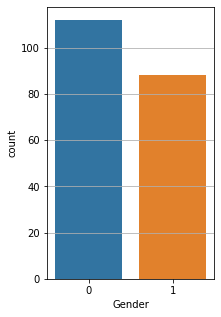

In [10]:
plt.figure(figsize=(3, 5))
plt.grid(True)


sns.countplot(x=df.Gender)

## Any correlation between columns

<AxesSubplot:>

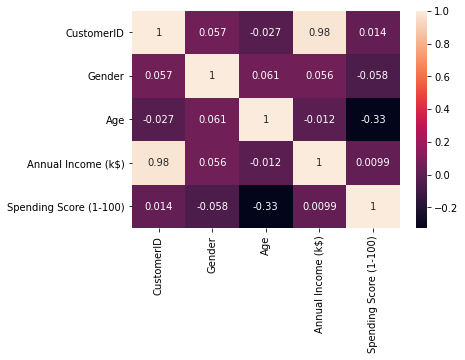

In [11]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

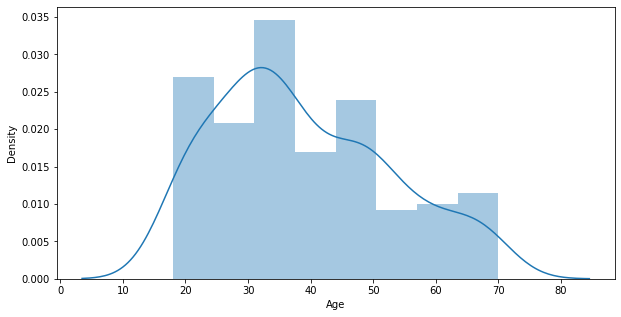

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(df.Age)

<AxesSubplot:ylabel='Density'>

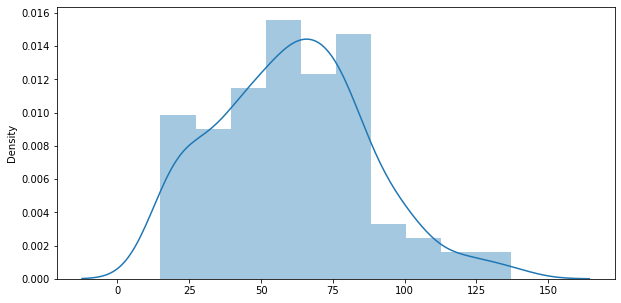

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(df['Annual Income (k$)'].values)

<AxesSubplot:ylabel='Density'>

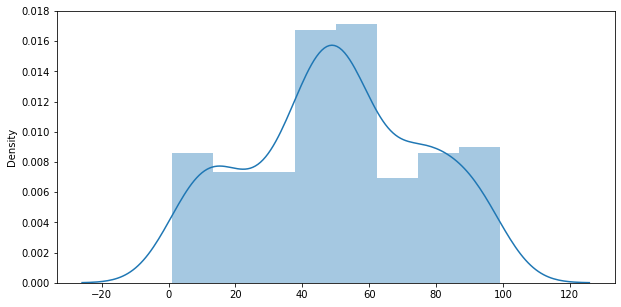

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(df['Spending Score (1-100)'].values)

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [16]:
gp_age = df.groupby(['Age']).sum()
gp_age.sort_values('Spending Score (1-100)', ascending=False)

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
Age,,,,
32,1678,5,959,726
35,621,3,420,575
30,928,2,533,562
31,600,1,387,511
29,557,1,318,383
23,347,0,249,380
38,795,2,447,379
27,660,2,379,362
21,261,1,194,334


### Annual income Vs Spending

Text(0, 0.5, 'Spending in k$')

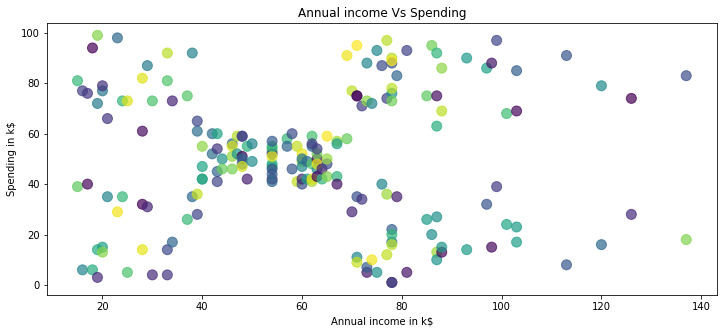

In [17]:
plt.figure(figsize=(12,5))
N = 200
colors = np.random.rand(N)

plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=colors, s=100, alpha=0.7)

plt.title("Annual income Vs Spending")
plt.xlabel('Annual income in k$')
plt.ylabel('Spending in k$')

### Age Vs Spending

Text(0, 0.5, 'Spending in k$')

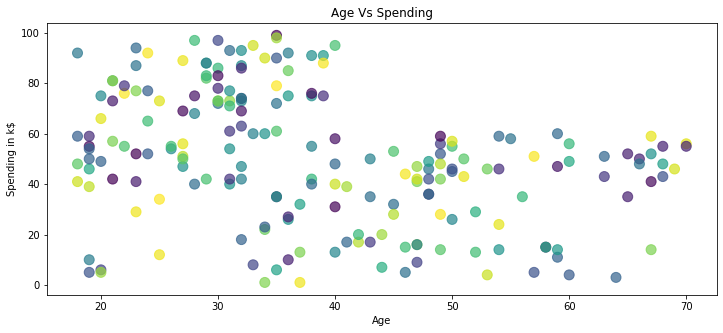

In [18]:
plt.figure(figsize=(12,5))
N = 200
colors = np.random.rand(N)

plt.scatter(x=df['Age'], y=df['Spending Score (1-100)'], c=colors, s=100, alpha=0.7)

plt.title("Age Vs Spending")
plt.xlabel('Age')
plt.ylabel('Spending in k$')

### Age Vs Annual Income

Text(0, 0.5, 'Annual Income (k$)')

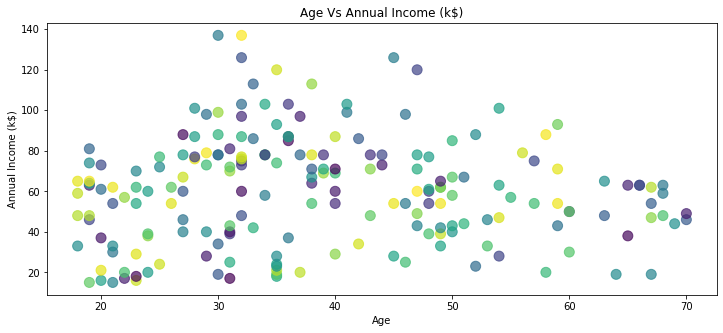

In [19]:
plt.figure(figsize=(12,5))
N = 200
colors = np.random.rand(N)

plt.scatter(x=df['Age'], y=df['Annual Income (k$)'], c=colors, s=100, alpha=0.7)

plt.title("Age Vs Annual Income (k$)")
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

## Age vs Annual income wrt Gender

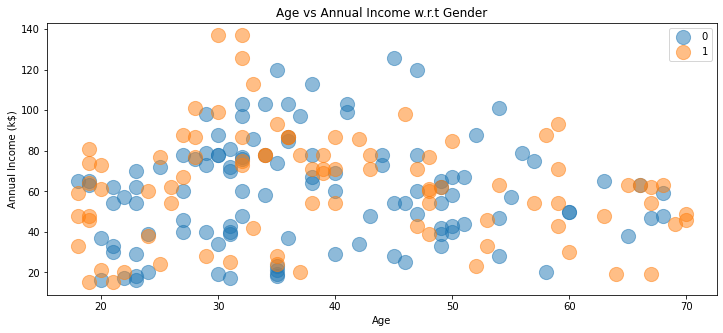

In [58]:
plt.figure(figsize = (12 , 5))

for gender in range(0,2):
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , 
                data = df[df['Gender'] == gender] ,
                s = 200 , 
                alpha = 0.5 , 
                label = gender) 
    
    '''
    s = size of pointors
    alpha = traparancy
    '''
    
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

## Annual income vs spending wrt Gender

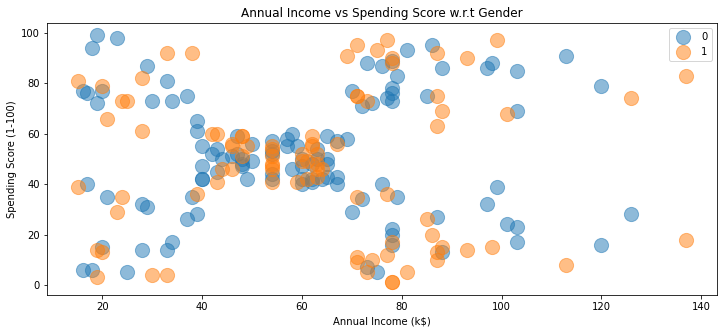

In [21]:
plt.figure(figsize = (12 , 5))

for gender in range(0,2):
    plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
                data = df[df['Gender'] == gender] ,
                s = 200 , 
                alpha = 0.5 , 
                label = gender)
    
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

## Clustering using K- means
### 1.Segmentation using Age and Spending Score

In [22]:
'''Age and spending Score'''

X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

inertia = []

for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,
                        init='k-means++', 
                        n_init = 10 ,
                        max_iter=300, 
                        tol=0.0001,  
                        random_state= 111  , 
                        algorithm='auto'))
    
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
    
# Note: intertia = within-cluster sum-of-squares criterion

In [23]:
# inertia

### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

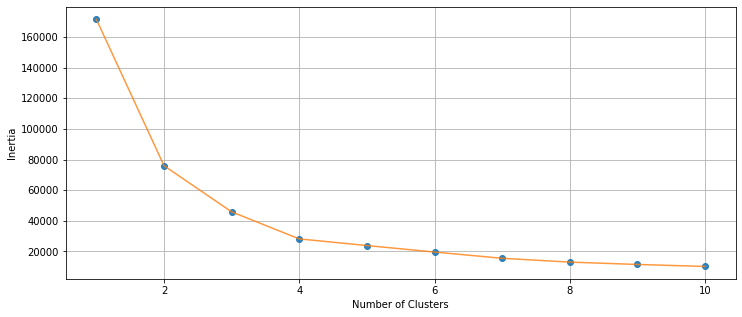

In [24]:
plt.figure(figsize = (12 ,5))
plt.grid(True)

plt.plot(np.arange(1 , 11) , inertia , 'o', alpha = 0.9)
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.8)

plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### calculating silhautte score to find the optimal number of clusters

In [25]:
for n in range(2,9):
    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)
    
    silhautte_avg = silhouette_score(X1, cluster_labels)
    
    print(f"for clisters= {n}, avg silhautte score is {silhautte_avg}")

for clisters= 2, avg silhautte score is 0.4692341232501655
for clisters= 3, avg silhautte score is 0.45300127016521263
for clisters= 4, avg silhautte score is 0.49973941540141753
for clisters= 5, avg silhautte score is 0.46553524067755037
for clisters= 6, avg silhautte score is 0.4376185638584134
for clisters= 7, avg silhautte score is 0.42313509747504796
for clisters= 8, avg silhautte score is 0.4304921688137185


In [26]:
model1 = (KMeans(n_clusters = 4 ,
                    init='k-means++', 
                    random_state= 111  , 
                    algorithm='auto'))

model1.fit(X1)
labels1 = model1.labels_  # assign the cluster number to customer 
centroids1 = model1.cluster_centers_ # tells the x,y value of all four clusters

In [27]:
labels1

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 0,
       1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [28]:
centroids1

array([[27.61702128, 49.14893617],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667]])

In [29]:
df_age_spending = df.copy()

## inserting new cluster column wrt each customer

In [30]:
df_age_spending["cluster_num"] = labels1

In [31]:
df_age_spending.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_num
0,1,1,19,15,39,0
1,2,1,21,15,81,2
2,3,0,20,16,6,1
3,4,0,23,16,77,2
4,5,0,31,17,40,0


### 2. Segmentation using  Annual Income and Spending Score

In [32]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='auto') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

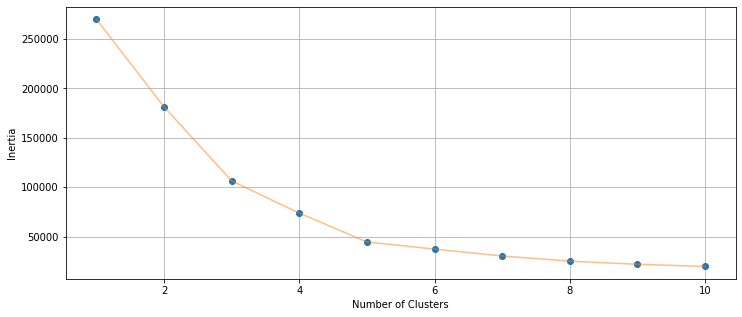

In [33]:
plt.figure(figsize = (12 ,5))
plt.grid(True)
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### calculating silhautte score to find the optimal number of clusters

In [34]:
for n in range(2,9):
    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)
    
    silhautte_avg = silhouette_score(X2, cluster_labels)
    
    print(f"for clisters= {n}, avg silhautte score is {silhautte_avg}")

for clisters= 2, avg silhautte score is 0.2968969162503008
for clisters= 3, avg silhautte score is 0.46761358158775435
for clisters= 4, avg silhautte score is 0.4931963109249047
for clisters= 5, avg silhautte score is 0.553931997444648
for clisters= 6, avg silhautte score is 0.5376203956398481
for clisters= 7, avg silhautte score is 0.5270287298101395
for clisters= 8, avg silhautte score is 0.4572211842776841


In [35]:
model2 = (KMeans(n_clusters = 5 ,
                    init='k-means++', 
                    n_init = 10 ,
                    max_iter=300, 
                    tol=0.0001,  
                    random_state= 111 , 
                    algorithm='auto'))

model2.fit(X2)
labels2 = model2.labels_
centroids2 = model2.cluster_centers_

In [36]:
labels2

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [37]:
centroids2

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [38]:
df_income_spending = df.copy()

## inserting new cluster column

In [39]:
df_income_spending["cluster_num"] = labels2

In [40]:
df_income_spending.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_num
0,1,1,19,15,39,4
1,2,1,21,15,81,0
2,3,0,20,16,6,4
3,4,0,23,16,77,0
4,5,0,31,17,40,4


### 3.Segmentation using Age , Annual Income and Spending Score

In [41]:
X3 = df[['Gender','Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,
                        init='k-means++', 
                        n_init = 10 ,
                        max_iter=300, 
                        tol=0.0001,  
                        random_state= 111 , 
                        algorithm='auto'))
    
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

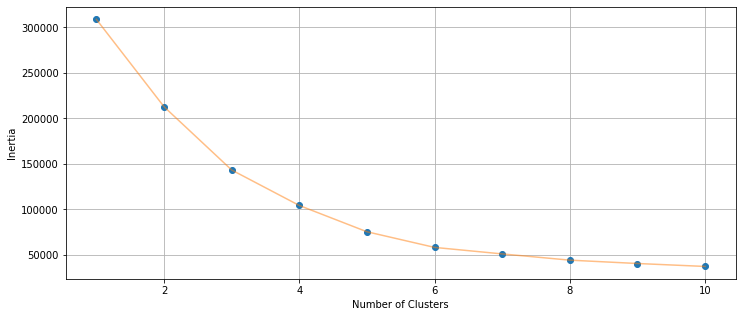

In [42]:
plt.figure(figsize = (12 ,5))
plt.grid(True)
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### calculating silhautte score to find the optimal number of clusters

In [43]:
for n in range(2,9):
    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = clusterer.fit_predict(X3)
    
    silhautte_avg = silhouette_score(X3, cluster_labels)
    
    print(f"for clisters= {n}, avg silhautte score is {silhautte_avg}")

for clisters= 2, avg silhautte score is 0.29307334005502633
for clisters= 3, avg silhautte score is 0.383798873822341
for clisters= 4, avg silhautte score is 0.4052954330641215
for clisters= 5, avg silhautte score is 0.4440669204743008
for clisters= 6, avg silhautte score is 0.45205475380756527
for clisters= 7, avg silhautte score is 0.43949619264530887
for clisters= 8, avg silhautte score is 0.4349105351263195


In [44]:
model3 = (KMeans(n_clusters = 6 ,
                    init='k-means++', 
                    n_init = 10 ,
                    max_iter=300, 
                    tol=0.0001,  
                    random_state= 111 , 
                    algorithm='auto'))

model3.fit(X3)
labels3 = model3.labels_
centroids3 = model3.cluster_centers_

In [45]:
labels3

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 2, 5, 2, 0,
       4, 5, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [46]:
centroids3

array([[ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636]])

In [47]:
df_gender_age_income_spending = df.copy()

## inserting new cluster column

In [48]:
df_gender_age_income_spending['cluster_num'] = labels3

In [49]:
df_gender_age_income_spending.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_num
0,1,1,19,15,39,4
1,2,1,21,15,81,5
2,3,0,20,16,6,4
3,4,0,23,16,77,5
4,5,0,31,17,40,4


In [50]:
df_all_clusters = df.copy()

In [51]:
df_all_clusters['age_spending_cluster'] = labels1
df_all_clusters['income_spending_cluster'] = labels2
df_all_clusters['gender_age_income_spending'] = labels3

In [52]:
df_all_clusters.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_spending_cluster,income_spending_cluster,gender_age_income_spending
0,1,1,19,15,39,0,4,4
1,2,1,21,15,81,2,0,5
2,3,0,20,16,6,1,4,4
3,4,0,23,16,77,2,0,5
4,5,0,31,17,40,0,4,4


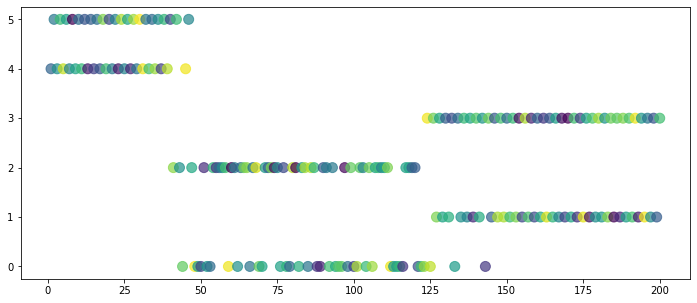

In [53]:
plt.figure(figsize=(12,5))
N = 200
colors = np.random.rand(N)

plt.scatter(x=df_all_clusters.CustomerID, y=df_all_clusters.gender_age_income_spending, c=colors, s=100, alpha=0.7)

## Converting to csv file with cluster columns

In [54]:
df_all_clusters.to_csv('mall_customers_clustered_ipynb.csv')

In [55]:
from joblib import dump, load

dump(model3, 'cust_seg_kmeans_model3.pkl')

['cust_seg_kmeans_model3.pkl']

In [56]:
model3_load = load('cust_seg_kmeans_model3.pkl') 

In [57]:
model3_load.predict([[ 1, 21,  15,  81]])

array([5])